In [1]:
from utils.binaries import *
from utils.plotting import *

from datetime import date, timedelta

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

17:03:42 (  +860ms) [INFO   ] -- import logging
17:03:42 (  +172ms) [INFO   ] -- import numpy as np
17:03:42 (   +10ms) [INFO   ] -- import uncertainties
17:03:43 (  +410ms) [INFO   ] -- import pandas as pd
17:03:43 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
17:03:43 (    +3ms) [INFO   ] -- import binaries.tools as tools
17:03:43 (  +465ms) [INFO   ] -- import matplotlib.pyplot as plt
17:03:44 (  +623ms) [INFO   ] -- import seaborn as so
17:03:44 (    +4ms) [INFO   ] -- import plotting.tools as plot
17:03:44 (   +17ms) [DEBUG  ] -- font size set to 9.5
17:03:44 (    +1ms) [DEBUG  ] -- label size set to 13.0
17:03:44 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
17:03:44 (    +1ms) [DEBUG  ] -- markersize set to 2.0
17:03:44 (    +1ms) [DEBUG  ] -- usetex set to False


Text(0.5, 0, 'temperature / $^\\circ$C')

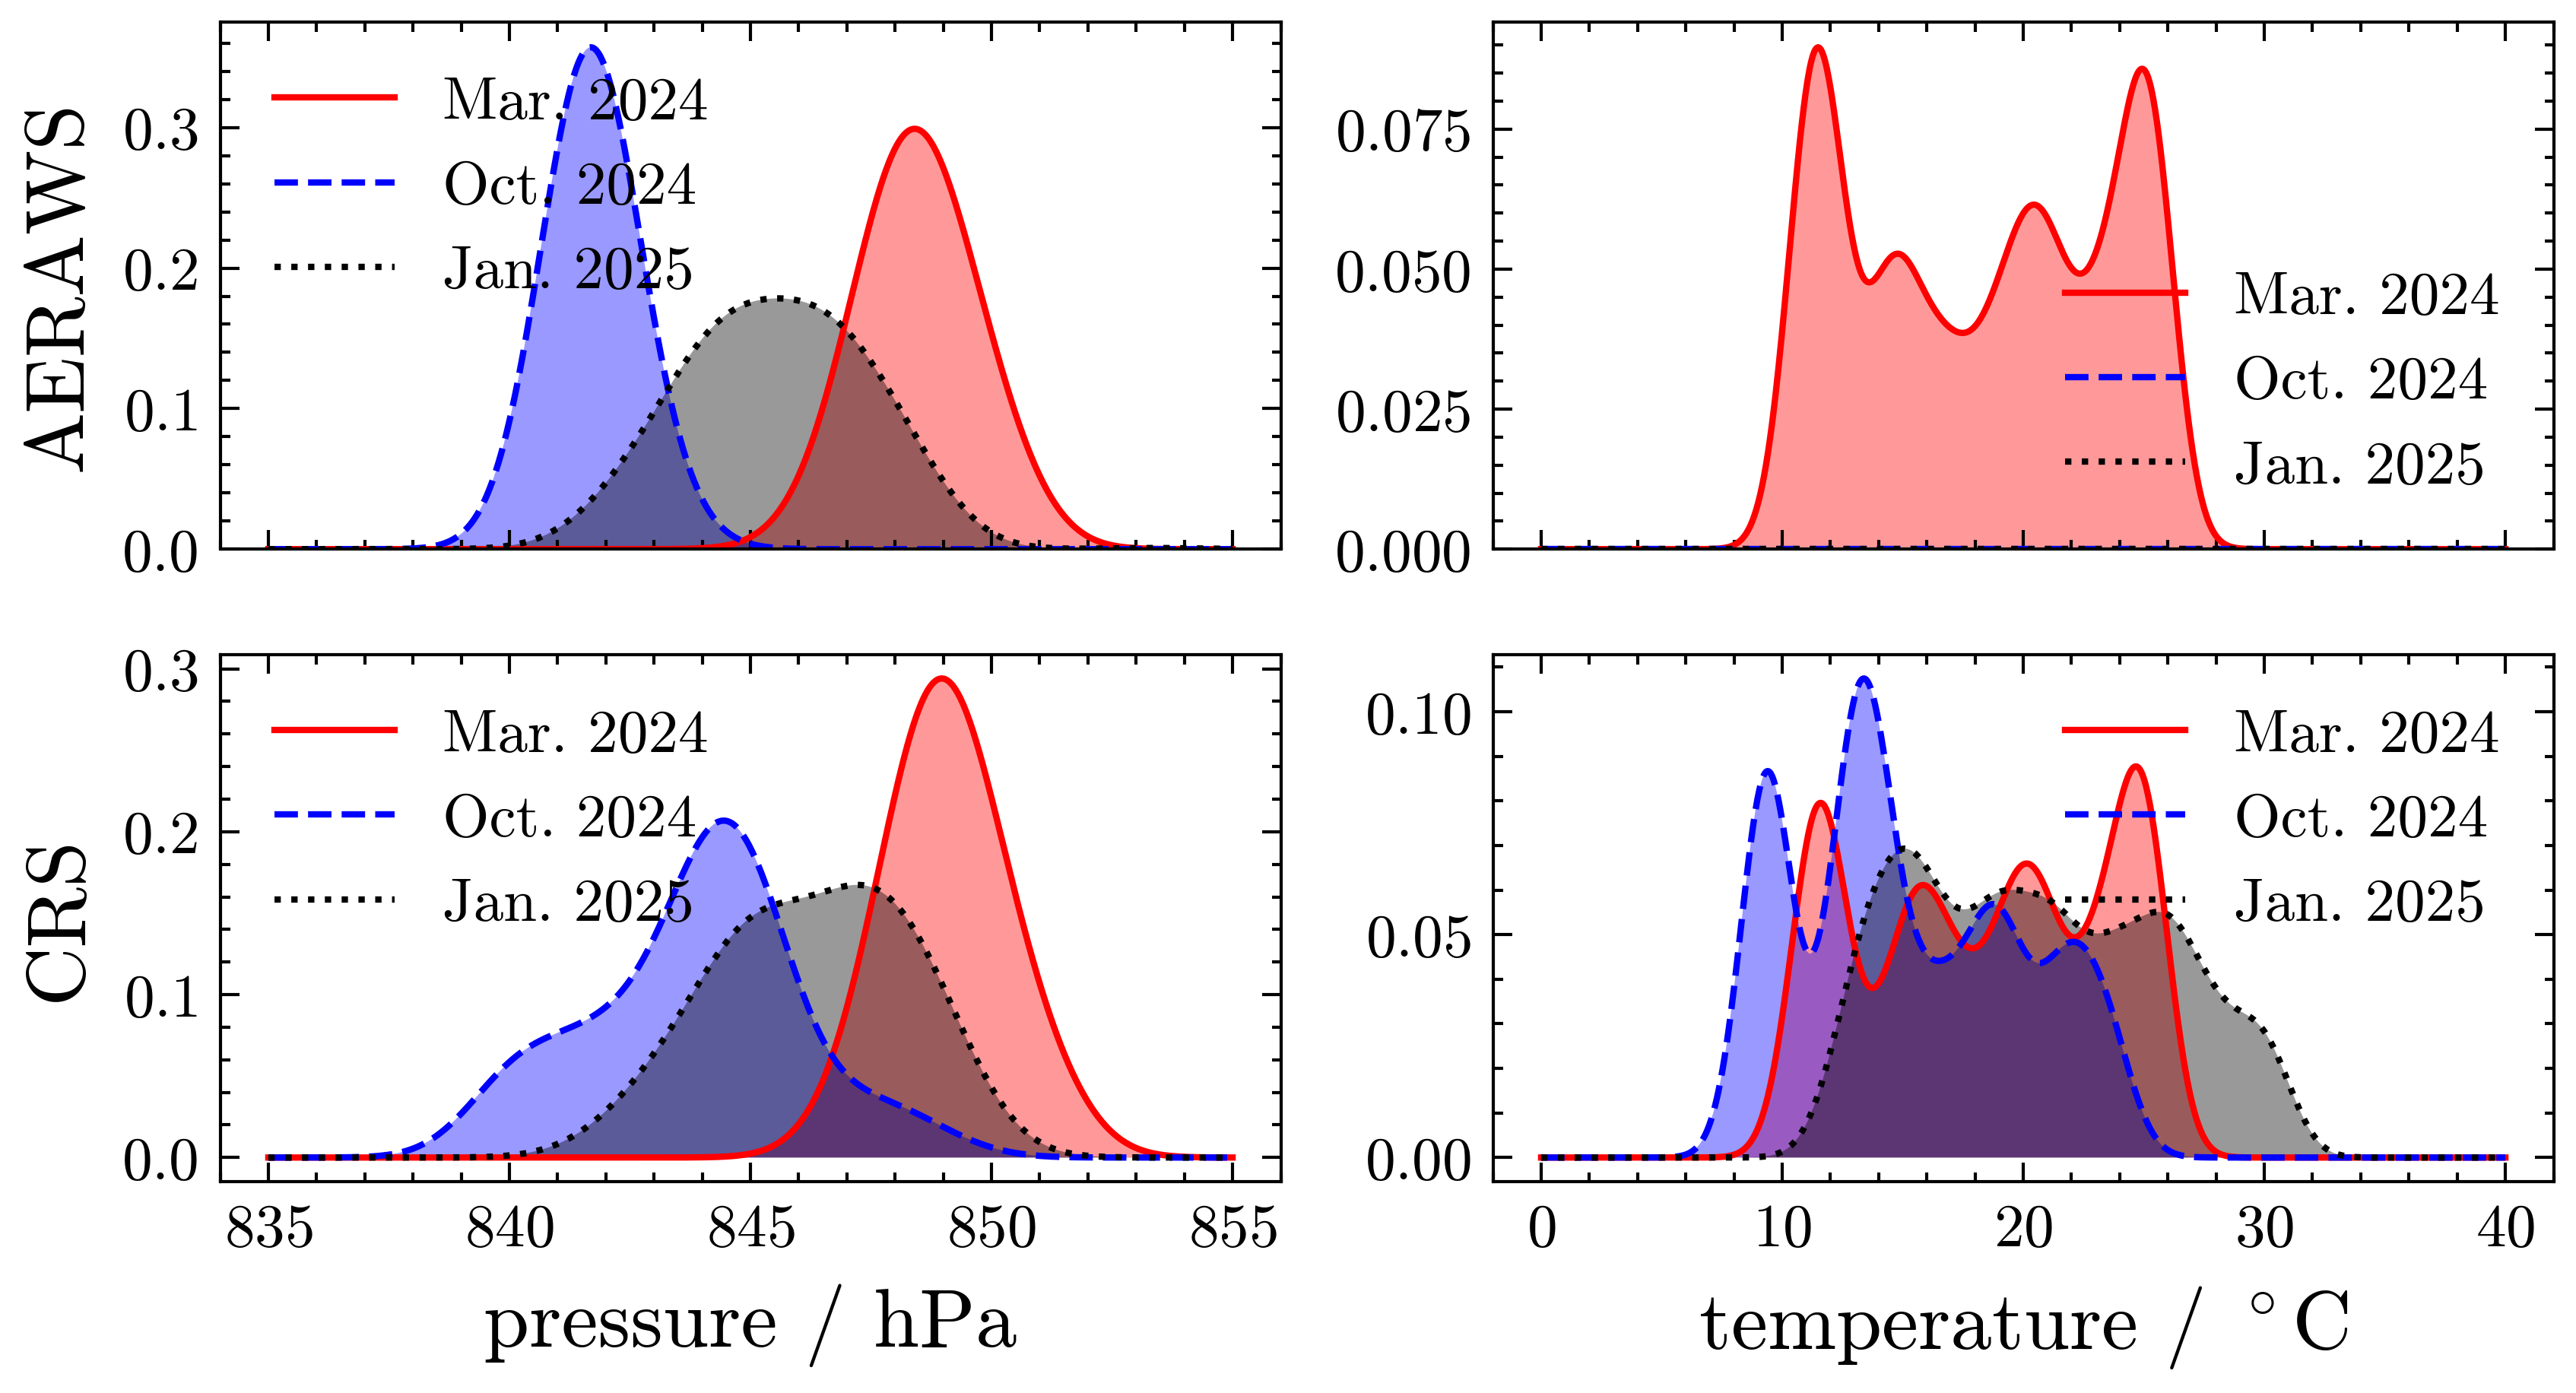

In [20]:
date_tuples = [
    [date(2024,  3, 24), date(2024,  3, 24)],         # initial rate-threshold acquisition
    [date(2024, 10, 23), date(2024, 10, 25)],         # test with Borboran (609), showing 17%
    [date(2025,  1,  8), date(2025,  1, 14)],         # current status w/ Infill, ~20%
]

colors = ['r', 'b', 'k']
labels=['Mar. 2024', 'Oct. 2024', 'Jan. 2025']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col')

for (start, stop), color, label in zip(date_tuples, colors, labels):

    temp_CRS, press_CRS = [], []
    temp_AWS, press_AWS = [], []

    for d in daterange(start, stop):
        try:
            p, t = np.loadtxt(f'/cr/work/filip/weather_correlation/AERAWS_{d.year:04}_{d.month:02}_{d.day:02}.dat', usecols=[1, 2], unpack=True)
            if isinstance(p, np.float64):
                p = [p]
                t = [t]
            
            press_AWS += list(p)
            temp_AWS += list(t)
        except FileNotFoundError: continue

        try:
            p, t = np.loadtxt(f'/cr/work/filip/weather_correlation/CRS_{d.year:04}_{d.month:02}_{d.day:02}.dat', usecols=[1, 2], unpack=True)
            if isinstance(p, np.float64):
                p = [p]
                t = [t]
            
            press_CRS += list(p)
            temp_CRS += list(t)
        except FileNotFoundError: continue


    ft_CRS = tools.kd1d_estimate(temp_CRS)
    fp_CRS = tools.kd1d_estimate(press_CRS)
    ft_AWS = tools.kd1d_estimate(temp_AWS)
    fp_AWS = tools.kd1d_estimate(press_AWS)

    X_TEMP = np.linspace(0, 40, 1000)
    X_PRES = np.linspace(835, 855, 1000)

    ax1.fill_between(X_PRES, fp_AWS(X_PRES), alpha=0.4, color=color, ec='none')
    ax1.plot(X_PRES, fp_AWS(X_PRES), marker='none', c=color, label=label)

    ax2.fill_between(X_TEMP, ft_AWS(X_TEMP), alpha=0.4, color=color, ec='none')
    ax2.plot(X_TEMP, ft_AWS(X_TEMP), marker='none', c=color, label=label)

    ax3.fill_between(X_PRES, fp_CRS(X_PRES), alpha=0.4, color=color, ec='none')
    ax3.plot(X_PRES, fp_CRS(X_PRES), marker='none', c=color, label=label)

    ax4.fill_between(X_TEMP, ft_CRS(X_TEMP), alpha=0.4, color=color, ec='none')
    ax4.plot(X_TEMP, ft_CRS(X_TEMP), marker='none', c=color, label=label)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax1.set_ylim(0)
ax2.set_ylim(0)
ax1.set_ylabel('AERAWS')
ax3.set_ylabel('CRS')
ax3.set_xlabel("pressure / hPa")
ax4.set_xlabel("temperature / $^\circ$C")